In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Add_sales_data_2018.csv')

In [3]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
df.shape

(205, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [7]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

There are non null values.

# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

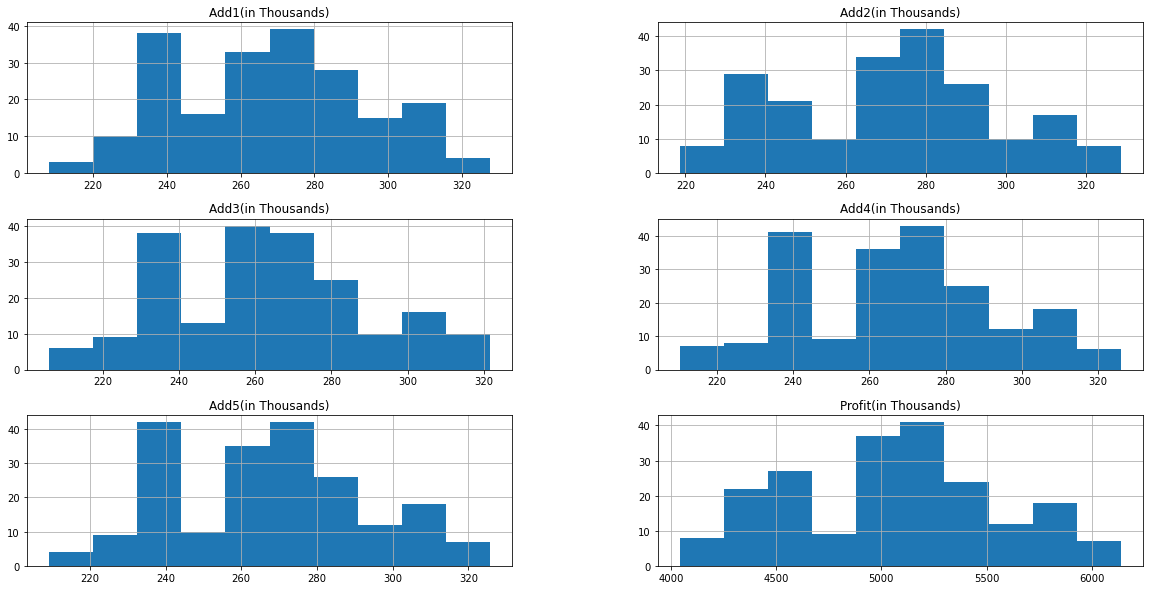

In [8]:
freqgraph=df.select_dtypes('float64')
freqgraph.hist(figsize=(20,10))
plt.show()

None of them are normally distributed.

In [9]:
corrmatrix=df.corr()
corrmatrix

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

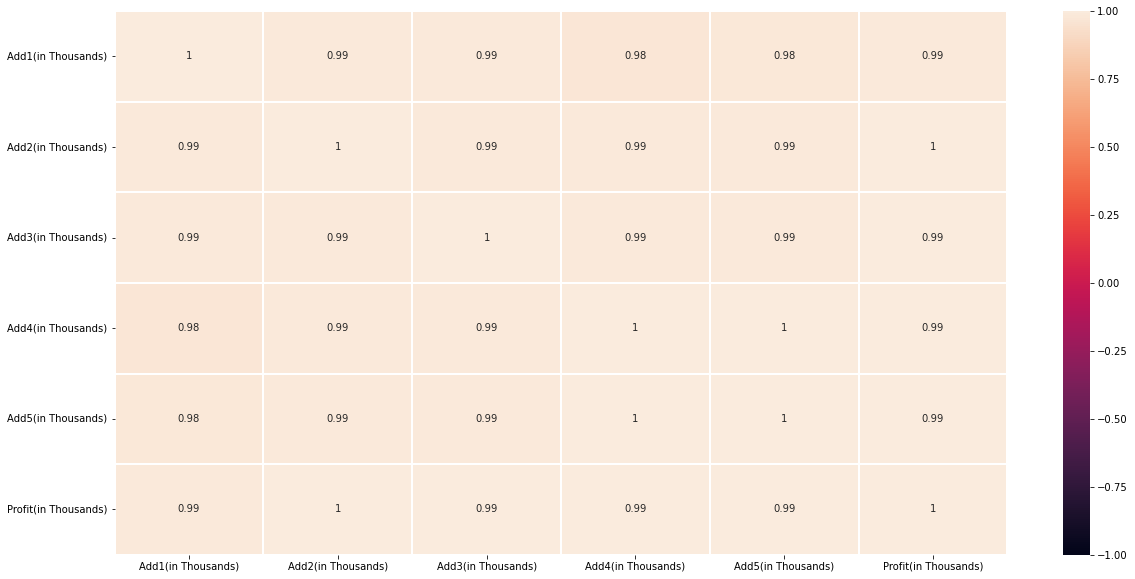

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=0.3)

The heat map shows that advertisements of 5 different companies are highly correlated.

The profit depends on the money spent on 5 different companies.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [22]:
y=df['Profit(in Thousands)']
X=df[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [29]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions

array([4494.144, 5921.116, 4404.686, 4190.965, 5880.541, 5728.804,
       5225.14 , 5017.503, 5518.561, 4513.6  , 4464.11 , 5140.372,
       4760.877, 5038.222, 4606.34 , 5730.999, 4922.845, 4470.775,
       4480.363, 5065.652, 5043.705, 5491.792, 4968.03 , 5792.175,
       6137.8  , 5247.011, 5137.534, 5373.275, 5212.949, 4898.776,
       5972.337, 5745.806, 5153.977, 5805.521, 4763.69 , 4175.677,
       5938.474, 4915.682, 4523.704, 5113.337, 4648.627])

In [30]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,predictions)
print("MSE  :",MSE)

MSE  : 1.1499828028176238e-24


In [31]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,predictions)
print("R2_Score  :",r2_score)

R2_Score  : 1.0


Since the MSE value is 1.15e-24 and r2_score value is 1,the model is a good one.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement. 


Add1(in Thousands) 290

Add2(in Thousands) 312

Add3(in Thousands) 309

Add4(in Thousands) 298

Add5(in Thousands) 320

In [33]:
X=np.array([290,312,309,298,320]).reshape(1,-1)
X

array([[290, 312, 309, 298, 320]])

In [35]:
y=model.predict(X)
y

C:\Users\ollak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5820.06])

Hence the profit generated by the company,by spending the above mentioned amount is 5820.06.